In [1]:
from math import *
import numpy as np
import pandas as pd
from TEN import TEN
TX = TEN('plot')
TX.read_bus()

Loading sub
Loading genbus
Loading bus2sub
Loading windfarm
Loading branches
Loading NRELsites
Done loading
Loading bus


In [2]:
def greatCircleDistance(lat1, lon1, lat2, lon2):
    R = 6368
    def haversin(x):
        return sin(x/2)**2 
    return R*2 * asin(sqrt(
          haversin(lat2-lat1) +
          cos(lat1) * cos(lat2) * haversin(lon2-lon1)))


In [3]:
TX.branches['dist'] = TX.branches.apply(lambda row : greatCircleDistance(row['from_lat'],row['from_lon'],row['to_lat'],row['to_lon']), axis=1)

In [4]:
TX.branches['baseKV']=TX.bus.set_index('busID').reindex(TX.branches['from'])['baseKV'].values

In [5]:
TX.CongStatBase = pd.concat([TX.CongStatBase, TX.branches['dist'],TX.branches['baseKV']],axis=1)

In [8]:
TX.CongStatBase.sort_values('baseKV',ascending=False).sort_values('Capacity',ascending=False)

,Capacity,hutil1,hutil0p9-1,hutil0p8-0p9,hutil>=0p9,hutil>=0p8,dist,baseKV
line,,,,,,,,
1916,4352,0,0,0,0,0,0.000000,13.8
1378,4352,0,0,0,0,0,0.000000,161.0
850,4352,0,0,0,0,0,0.000000,161.0
2512,4352,0,0,0,0,0,536.249167,500.0
1448,3146,0,0,0,0,0,0.000000,13.2
1221,3146,0,0,0,0,0,0.000000,161.0
2612,3146,0,0,0,0,0,631.554472,500.0
1247,3146,0,1,58,1,59,815.637476,161.0
862,3146,0,0,0,0,0,0.000000,161.0


In [ ]:
# Create Texas Map and analyse lines. 
# Figure out in which county a line is.
# Does the line goes over county boundary
# Do the same with the weater zones

In [3]:
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point, Polygon, MultiPolygon,MultiLineString

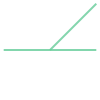

In [96]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
MultiLineString(coords)


In [6]:
from_bus = TX.branches[['from_lon','from_lat']].values.tolist()
to_bus = TX.branches[['to_lon','to_lat']].values.tolist()
[fbx,fby] =zip(*from_bus)
[tbx,tby] =zip(*to_bus)
from_zip = zip(fbx,fby)
to_zip = zip(tbx,tby)
TX_MultiLines = MultiLineString(list(zip(from_zip,to_zip)))
TX_lines = gpd.GeoSeries(data = TX_MultiLines)

In [152]:
[ax,ay] =zip(*aa)
[bx,by] =zip(*)

In [182]:
TX_lines

0       LINESTRING (-102.262348 31.906736, -102.312423...
1       LINESTRING (-102.262348 31.906736, -102.312423...
2       LINESTRING (-102.262348 31.906736, -102.3264 3...
3       LINESTRING (-102.262348 31.906736, -102.3264 3...
4       LINESTRING (-104.519139 29.888046, -104.624514...
5         LINESTRING (-104.3 29.6, -104.519139 29.888046)
6       LINESTRING (-101.647778 32.926389, -101.647778...
7       LINESTRING (-101.578617 32.929014, -101.647778...
8       LINESTRING (-101.764414 32.92701, -101.647778 ...
9       LINESTRING (-101.647778 32.926389, -100.954661...
10      LINESTRING (-101.388333 32.2075, -101.388333 3...
11       LINESTRING (-101.22 32.039, -101.388333 32.2075)
12      LINESTRING (-101.388333 32.2075, -101.422436 3...
13      LINESTRING (-101.365434 32.102911, -101.388333...
14      LINESTRING (-104.624514 31.09348, -104.005761 ...
15      LINESTRING (-103.759065 31.004969, -104.624514...
16      LINESTRING (-102.201433 30.931467, -102.201433...
17      LINEST

In [157]:
TX_MultiLines = MultiLineString(list(zip(from_zip,to_zip)))

In [172]:
TX_lines = gpd.GeoSeries(data = TX_MultiLines)

In [18]:
TEN.bus[TEN.bus['busID']==3147]

,busID,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin,lam_P,lam_Q,mu_Vmax,mu_Vmin,lat,lon
370,3147,1,34.76,9.85,0,29.16,3,1.02,-56.13382,115.0,28,1.1,0.9,58.06,0.0,0.0,0.0,NaN,NaN


In [3]:
TEN.sub.reindex(TEN.bus2sub.reindex(3147)['subID'])['lat'].values
TEN.sub.reindex(TEN.bus2sub.reindex(3147)['subID'])['lon'].values

TypeError: 'int' object is not iterable

In [35]:
TX.bus2sub2 = pd.read_csv(TX.data_loc+'bus2sub.txt',sep='\s+',header = None)
TX.bus2sub2 = TX.bus2sub2[[0,10]].rename(columns={0:'busID',10:'subNum'})

In [41]:
TX.bus2sub2[TX.bus2sub2['busID']==3147]

,busID,subNum
370,3147,234


In [17]:
for index in range(TX_lines.size):
    print(index)
    print(gdf.contains(TX_lines[index]))

0
0    False
dtype: bool
1
0    False
dtype: bool
2
0    False
dtype: bool
3
0    False
dtype: bool
4
0    False
dtype: bool
5
0    False
dtype: bool
6
0    False
dtype: bool
7
0    False
dtype: bool
8
0    False
dtype: bool
9
0    False
dtype: bool
10
0    False
dtype: bool
11
0    False
dtype: bool
12
0    False
dtype: bool
13
0    False
dtype: bool
14
0    False
dtype: bool
15
0    False
dtype: bool
16
0    False
dtype: bool
17
0    False
dtype: bool
18
0    False
dtype: bool
19
0    False
dtype: bool
20
0    False
dtype: bool
21
0    False
dtype: bool
22
0    False
dtype: bool
23
0    False
dtype: bool
24
0    False
dtype: bool
25
0    False
dtype: bool
26
0    False
dtype: bool
27
0    False
dtype: bool
28
0    False
dtype: bool
29
0    False
dtype: bool
30
0    False
dtype: bool
31
0    False
dtype: bool
32
0    False
dtype: bool
33
0    False
dtype: bool
34
0    False
dtype: bool
35
0    False
dtype: bool
36
0    False
dtype: bool
37
0    False
dtype: bool
38
0    False
dtype: b

dtype: bool
500
0    False
dtype: bool
501
0    False
dtype: bool
502
0    False
dtype: bool
503
0    False
dtype: bool
504
0    False
dtype: bool
505
0    False
dtype: bool
506
0    False
dtype: bool
507
0    False
dtype: bool
508
0    False
dtype: bool
509
0    False
dtype: bool
510
0    False
dtype: bool
511
0    False
dtype: bool
512
0    False
dtype: bool
513
0    False
dtype: bool
514
0    False
dtype: bool
515
0    False
dtype: bool
516
0    False
dtype: bool
517
0    False
dtype: bool
518
0    False
dtype: bool
519
0    False
dtype: bool
520
0    False
dtype: bool
521
0    False
dtype: bool
522
0    False
dtype: bool
523
0    False
dtype: bool
524
0    False
dtype: bool
525
0    False
dtype: bool
526
0    False
dtype: bool
527
0    False
dtype: bool
528
0    False
dtype: bool
529
0    False
dtype: bool
530
0    False
dtype: bool
531
0    False
dtype: bool
532
0    False
dtype: bool
533
0    False
dtype: bool
534
0    False
dtype: bool
535
0    False
dtype: bool
536
0    False
d

0    False
dtype: bool
937
0    False
dtype: bool
938
0    False
dtype: bool
939
0    False
dtype: bool
940
0    False
dtype: bool
941
0    False
dtype: bool
942
0    False
dtype: bool
943
0    False
dtype: bool
944
0    False
dtype: bool
945
0    False
dtype: bool
946
0    False
dtype: bool
947
0    False
dtype: bool
948
0    False
dtype: bool
949
0    False
dtype: bool
950
0    False
dtype: bool
951
0    False
dtype: bool
952
0    False
dtype: bool
953
0    False
dtype: bool
954
0    False
dtype: bool
955
0    False
dtype: bool
956
0    False
dtype: bool
957
0    False
dtype: bool
958
0    False
dtype: bool
959
0    False
dtype: bool
960
0    False
dtype: bool
961
0    False
dtype: bool
962
0    False
dtype: bool
963
0    False
dtype: bool
964
0    False
dtype: bool
965
0    False
dtype: bool
966
0    False
dtype: bool
967
0    False
dtype: bool
968
0    False
dtype: bool
969
0    False
dtype: bool
970
0    False
dtype: bool
971
0    False
dtype: bool
972
0    False
dtype: bool
973
0

dtype: bool
1297
0    False
dtype: bool
1298
0    False
dtype: bool
1299
0    False
dtype: bool
1300
0    False
dtype: bool
1301
0    False
dtype: bool
1302
0    False
dtype: bool
1303
0    False
dtype: bool
1304
0    False
dtype: bool
1305
0    False
dtype: bool
1306
0    False
dtype: bool
1307
0    False
dtype: bool
1308
0    False
dtype: bool
1309
0    False
dtype: bool
1310
0    False
dtype: bool
1311
0    False
dtype: bool
1312
0    False
dtype: bool
1313
0    False
dtype: bool
1314
0    False
dtype: bool
1315
0    False
dtype: bool
1316
0    False
dtype: bool
1317
0    False
dtype: bool
1318
0    False
dtype: bool
1319
0    False
dtype: bool
1320
0    False
dtype: bool
1321
0    False
dtype: bool
1322
0    False
dtype: bool
1323
0    False
dtype: bool
1324
0    False
dtype: bool
1325
0    False
dtype: bool
1326
0    False
dtype: bool
1327
0    False
dtype: bool
1328
0    False
dtype: bool
1329
0    False
dtype: bool
1330
0    False
dtype: bool
1331
0    False
dtype: bool
1332
0  

0    True
dtype: bool
1628
0    True
dtype: bool
1629
0    True
dtype: bool
1630
0    False
dtype: bool
1631
0    False
dtype: bool
1632
0    False
dtype: bool
1633
0    False
dtype: bool
1634
0    False
dtype: bool
1635
0    False
dtype: bool
1636
0    False
dtype: bool
1637
0    False
dtype: bool
1638
0    False
dtype: bool
1639
0    False
dtype: bool
1640
0    False
dtype: bool
1641
0    False
dtype: bool
1642
0    False
dtype: bool
1643
0    False
dtype: bool
1644
0    False
dtype: bool
1645
0    False
dtype: bool
1646
0    False
dtype: bool
1647
0    False
dtype: bool
1648
0    False
dtype: bool
1649
0    False
dtype: bool
1650
0    False
dtype: bool
1651
0    False
dtype: bool
1652
0    False
dtype: bool
1653
0    False
dtype: bool
1654
0    False
dtype: bool
1655
0    False
dtype: bool
1656
0    False
dtype: bool
1657
0    False
dtype: bool
1658
0    False
dtype: bool
1659
0    False
dtype: bool
1660
0    False
dtype: bool
1661
0    False
dtype: bool
1662
0    False
dtype: bool


dtype: bool
1924
0    False
dtype: bool
1925
0    False
dtype: bool
1926
0    False
dtype: bool
1927
0    True
dtype: bool
1928
0    True
dtype: bool
1929
0    True
dtype: bool
1930
0    True
dtype: bool
1931
0    True
dtype: bool
1932
0    True
dtype: bool
1933
0    False
dtype: bool
1934
0    False
dtype: bool
1935
0    False
dtype: bool
1936
0    False
dtype: bool
1937
0    False
dtype: bool
1938
0    True
dtype: bool
1939
0    False
dtype: bool
1940
0    False
dtype: bool
1941
0    False
dtype: bool
1942
0    False
dtype: bool
1943
0    False
dtype: bool
1944
0    False
dtype: bool
1945
0    False
dtype: bool
1946
0    False
dtype: bool
1947
0    False
dtype: bool
1948
0    False
dtype: bool
1949
0    False
dtype: bool
1950
0    False
dtype: bool
1951
0    False
dtype: bool
1952
0    False
dtype: bool
1953
0    False
dtype: bool
1954
0    False
dtype: bool
1955
0    False
dtype: bool
1956
0    False
dtype: bool
1957
0    False
dtype: bool
1958
0    False
dtype: bool
1959
0    False

dtype: bool
2339
0    False
dtype: bool
2340
0    False
dtype: bool
2341
0    False
dtype: bool
2342
0    False
dtype: bool
2343
0    False
dtype: bool
2344
0    False
dtype: bool
2345
0    False
dtype: bool
2346
0    False
dtype: bool
2347
0    False
dtype: bool
2348
0    False
dtype: bool
2349
0    False
dtype: bool
2350
0    False
dtype: bool
2351
0    False
dtype: bool
2352
0    False
dtype: bool
2353
0    False
dtype: bool
2354
0    False
dtype: bool
2355
0    False
dtype: bool
2356
0    False
dtype: bool
2357
0    False
dtype: bool
2358
0    False
dtype: bool
2359
0    False
dtype: bool
2360
0    False
dtype: bool
2361
0    False
dtype: bool
2362
0    False
dtype: bool
2363
0    False
dtype: bool
2364
0    False
dtype: bool
2365
0    False
dtype: bool
2366
0    False
dtype: bool
2367
0    False
dtype: bool
2368
0    False
dtype: bool
2369
0    False
dtype: bool
2370
0    False
dtype: bool
2371
0    False
dtype: bool
2372
0    False
dtype: bool
2373
0    False
dtype: bool
2374
0  

2689
0    False
dtype: bool
2690
0    False
dtype: bool
2691
0    False
dtype: bool
2692
0    False
dtype: bool
2693
0    False
dtype: bool
2694
0    False
dtype: bool
2695
0    False
dtype: bool
2696
0    False
dtype: bool
2697
0    False
dtype: bool
2698
0    False
dtype: bool
2699
0    False
dtype: bool
2700
0    False
dtype: bool
2701
0    False
dtype: bool
2702
0    False
dtype: bool
2703
0    False
dtype: bool
2704
0    False
dtype: bool
2705
0    False
dtype: bool
2706
0    False
dtype: bool
2707
0    False
dtype: bool
2708
0    False
dtype: bool
2709
0    False
dtype: bool
2710
0    False
dtype: bool
2711
0    False
dtype: bool
2712
0    False
dtype: bool
2713
0    False
dtype: bool
2714
0    False
dtype: bool
2715
0    False
dtype: bool
2716
0    False
dtype: bool
2717
0    False
dtype: bool
2718
0    False
dtype: bool
2719
0    False
dtype: bool
2720
0    False
dtype: bool
2721
0    False
dtype: bool
2722
0    False
dtype: bool
2723
0    False
dtype: bool
2724
0    False
dtyp

dtype: bool
3039
0    False
dtype: bool
3040
0    False
dtype: bool
3041
0    False
dtype: bool
3042
0    False
dtype: bool
3043
0    False
dtype: bool
3044
0    False
dtype: bool
3045
0    False
dtype: bool
3046
0    False
dtype: bool
3047
0    False
dtype: bool
3048
0    False
dtype: bool
3049
0    False
dtype: bool
3050
0    False
dtype: bool
3051
0    False
dtype: bool
3052
0    False
dtype: bool
3053
0    False
dtype: bool
3054
0    False
dtype: bool
3055
0    False
dtype: bool
3056
0    False
dtype: bool
3057
0    False
dtype: bool
3058
0    False
dtype: bool
3059
0    False
dtype: bool
3060
0    False
dtype: bool
3061
0    False
dtype: bool
3062
0    False
dtype: bool
3063
0    False
dtype: bool
3064
0    False
dtype: bool
3065
0    False
dtype: bool
3066
0    False
dtype: bool
3067
0    False
dtype: bool
3068
0    False
dtype: bool
3069
0    False
dtype: bool
3070
0    False
dtype: bool
3071
0    False
dtype: bool
3072
0    False
dtype: bool
3073
0    False
dtype: bool
3074
0  

In [32]:
TX.branches[TX_lines.apply(gdf.contains)[0]]

,from,to,r,x,b,Capacity,rateB,rateC,ratio,angle,...,from_lat,from_lon,to_lat,to_lon,from_x,from_y,to_x,to_y,dist,baseKV
1624,6016,6168,0.00378,0.02630,0.00430,221.0,0,0,0,0,...,29.460646,-98.571279,29.406624,-98.630303,-1.097290e+07,3.434408e+06,-1.097948e+07,3.427503e+06,375.297730,115.0
1625,6016,6168,0.00378,0.02630,0.00430,221.0,0,0,0,0,...,29.460646,-98.571279,29.406624,-98.630303,-1.097290e+07,3.434408e+06,-1.097948e+07,3.427503e+06,375.297730,115.0
1626,6199,6016,0.00208,0.01421,0.00242,221.0,0,0,0,0,...,29.501708,-98.569451,29.460646,-98.571279,-1.097270e+07,3.439659e+06,-1.097290e+07,3.434408e+06,261.515547,115.0
1627,6199,6016,0.00208,0.01421,0.00242,221.0,0,0,0,0,...,29.501708,-98.569451,29.460646,-98.571279,-1.097270e+07,3.439659e+06,-1.097290e+07,3.434408e+06,261.515547,115.0
1628,6199,6016,0.00208,0.01421,0.00242,221.0,0,0,0,0,...,29.501708,-98.569451,29.460646,-98.571279,-1.097270e+07,3.439659e+06,-1.097290e+07,3.434408e+06,261.515547,115.0
1629,6016,6356,0.00315,0.01306,0.00222,400.0,0,0,0,0,...,29.460646,-98.571279,29.468413,-98.528889,-1.097290e+07,3.434408e+06,-1.096819e+07,3.435401e+06,111.800852,115.0
1665,6121,6025,0.00399,0.02277,0.00342,221.0,0,0,0,0,...,29.537264,-98.487882,29.590028,-98.525262,-1.096362e+07,3.444207e+06,-1.096778e+07,3.450960e+06,342.390146,115.0
1668,6352,6025,0.00808,0.01942,0.00264,221.0,0,0,0,0,...,29.634097,-98.497426,29.590028,-98.525262,-1.096468e+07,3.456603e+06,-1.096778e+07,3.450960e+06,283.575889,115.0
1708,6036,6334,0.00352,0.02515,0.04586,443.0,0,0,0,0,...,29.585862,-98.406811,29.503453,-98.664636,-1.095460e+07,3.450427e+06,-1.098330e+07,3.439882e+06,711.367633,230.0
1709,6094,6037,0.00228,0.01555,0.00264,221.0,0,0,0,0,...,29.627214,-98.427068,29.585862,-98.406811,-1.095685e+07,3.455721e+06,-1.095460e+07,3.450427e+06,265.075434,115.0


In [80]:
MultiLineString(TX.branches[['from_lon','from_lat']].values.tolist(),TX.branches[['to_lon','to_lat']].values.tolist())

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [11]:
gdf_nodes_start = gpd.GeoDataFrame(data={'x':TX.branches['from_lon'], 'y':TX.branches['from_lat']})
gdf_nodes_end = gpd.GeoDataFrame(data={'x':TX.branches['to_lon'], 'y':TX.branches['to_lat']})

In [23]:
gdf = ox.gdf_from_place('The Woodlands (CDP),Texas, USA')

In [6]:
gdf = ox.gdf_from_place('San Antonio, Texas, USA')

In [25]:
gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-154.954624,19.504453,19.50414,-154.954874,"POLYGON ((-154.9548739 19.5043869, -154.954835...","Woodlands Center, 15-1450, Kahakai Boulevard, ..."


In [132]:
# In case of state use this
[xx,yy] = zip(*list(gdf['geometry'][0].exterior.coords))

In [45]:
# In case of city use this
[xx,yy] = zip(*list(gdf['geometry'][0].geoms[0].exterior.coords))


In [4]:
us_states = us_states.data.copy()

del us_states["HI"]
del us_states["AK"]

#states_xys = [reproject_wgs_to_itm([us_states[code]["lons"],us_states[code]["lats"]]) for code in us_states]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]


In [68]:
list(gdf['geometry'][0].interiors)

[]

In [12]:
gdf_nodes_start.crs = gdf.crs
gdf_nodes_start.name = 'nodes'
gdf_nodes_start['geometry'] = gdf_nodes_start.apply(lambda row: Point((row['x'], row['y'])), axis=1)
gdf_nodes_end.crs = gdf.crs
gdf_nodes_end.name = 'nodes'
gdf_nodes_end['geometry'] = gdf_nodes_end.apply(lambda row: Point((row['x'], row['y'])), axis=1)

In [13]:
geometry = gdf['geometry'].iloc[0]
if isinstance(geometry, Polygon):
    geometry = MultiPolygon([geometry])

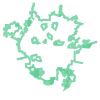

In [70]:
geometry.

In [14]:
sindex_start = gdf_nodes_start.sindex
possible_matches_index_start = list(sindex_start.intersection(geometry.bounds))
possible_matches_start = gdf_nodes_start.iloc[possible_matches_index_start]
precise_matches_start = possible_matches_start[possible_matches_start.intersects(geometry)]
sindex_end = gdf_nodes_end.sindex
possible_matches_index_end = list(sindex_end.intersection(geometry.bounds))
possible_matches_end = gdf_nodes_end.iloc[possible_matches_index_end]
precise_matches_end = possible_matches_end[possible_matches_end.intersects(geometry)]

In [50]:
intersect_index = precise_matches_start.index.intersection(precise_matches_end.index)

In [51]:
TX.branches.loc[intersect_index]

,from,to,r,x,b,Capacity,rateB,rateC,ratio,angle,...,mu_angmin,mu_angmax,from_lat,from_lon,to_lat,to_lon,from_x,from_y,to_x,to_y
2032,6205,6223,0.00232,0.01501,0.00286,221.0,0,0,0,0,...,0.0,0.0,30.167110,-97.823998,30.206844,-97.797420,-1.088972e+07,3.525048e+06,-1.088676e+07,3.530166e+06
2033,6205,6223,0.00232,0.01501,0.00286,221.0,0,0,0,0,...,0.0,0.0,30.167110,-97.823998,30.206844,-97.797420,-1.088972e+07,3.525048e+06,-1.088676e+07,3.530166e+06
2054,6223,6222,0.00029,0.01710,0.00000,457.0,0,0,1,0,...,0.0,0.0,30.206844,-97.797420,30.206844,-97.797420,-1.088676e+07,3.530166e+06,-1.088676e+07,3.530166e+06
2053,6223,6222,0.00029,0.01710,0.00000,457.0,0,0,1,0,...,0.0,0.0,30.206844,-97.797420,30.206844,-97.797420,-1.088676e+07,3.530166e+06,-1.088676e+07,3.530166e+06
2052,6223,6222,0.00029,0.01710,0.00000,457.0,0,0,1,0,...,0.0,0.0,30.206844,-97.797420,30.206844,-97.797420,-1.088676e+07,3.530166e+06,-1.088676e+07,3.530166e+06
1722,6222,6039,0.00129,0.00919,0.01675,443.0,0,0,0,0,...,0.0,0.0,30.206844,-97.797420,30.293424,-97.784408,-1.088676e+07,3.530166e+06,-1.088531e+07,3.541323e+06
1675,6028,6223,0.00261,0.01816,0.00297,221.0,0,0,0,0,...,0.0,0.0,30.216168,-97.856006,30.206844,-97.797420,-1.089328e+07,3.531367e+06,-1.088676e+07,3.530166e+06
1677,6028,6289,0.00980,0.05596,0.00841,98.0,0,0,0,0,...,0.0,0.0,30.216168,-97.856006,30.348236,-97.768136,-1.089328e+07,3.531367e+06,-1.088350e+07,3.548391e+06
1676,6028,6223,0.00261,0.01816,0.00297,221.0,0,0,0,0,...,0.0,0.0,30.216168,-97.856006,30.206844,-97.797420,-1.089328e+07,3.531367e+06,-1.088676e+07,3.530166e+06
2060,6227,6223,0.00231,0.01613,0.00264,250.0,0,0,0,0,...,0.0,0.0,30.243032,-97.765081,30.206844,-97.797420,-1.088316e+07,3.534828e+06,-1.088676e+07,3.530166e+06


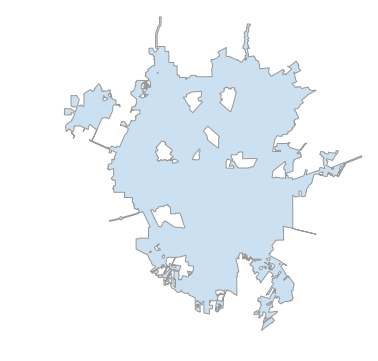

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24011406a58>)

In [57]:
import osmnx as ox
city = ox.gdf_from_place('Lucerne,Switzerland')
#ox.plot_graph(ox.graph_from_place('Lucerne,Switzerland'))
ox.plot_shape(ox.project_gdf(gdf))

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.show()

In [1]:
import numpy as np
from bokeh.io import show,output_notebook,output_file
from bokeh.models import Button, DataTable, TableColumn, PointDrawTool, PolyDrawTool, PolyEditTool, ColumnDataSource,TextInput
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LassoSelectTool,
    BoxSelectTool,
    LogColorMapper,
    CustomJS,
    Slider,
    CheckboxGroup,
    Select,
    Div,
    TapTool,
    ColorBar,
    LinearColorMapper,
    CategoricalColorMapper,
    DataTable,
    TableColumn,
    NumberFormatter,
    NumeralTickFormatter
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.layouts import (widgetbox, row, column, gridplot, layout)

from bokeh.tile_providers import CARTODBPOSITRON,STAMEN_TONER_BACKGROUND,STAMEN_TONER,STAMEN_TERRAIN

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata import us_states
from bokeh import events

import pandas as pd
from bokeh.colors.groups import yellow



from TEN import TEN
TX = TEN('plot')


Loading sub
Loading genbus
Loading bus2sub
Loading windfarm
Loading branches
Loading NRELsites
Done loading


In [8]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    if row[geom].type == 'MultiPolygon':
        exterior = row[geom].geoms[0].exterior
    elif row[geom].type == 'Point' or row[geom].type == 'LineString':
        return
    else:
        exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [9]:
gdf['x'] = gdf.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
gdf['y'] = gdf.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

In [65]:
gdf['geometry'].type == 'MultiPolygon'

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
      ...  
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46     True
47     True
48    False
49    False
50    False
51    False
52     True
53    False
54     True
55     True
56    False
57    False
58     True
59     True
60    False
61    False
62    False
63    False
64    False
65    False
66    False
Length: 67, dtype: bool

In [14]:
p = figure(
    title="Test",toolbar_location="left",plot_width=1200, plot_height=700,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None
p.toolbar.logo = None

p.patches(state_xs,state_ys, fill_alpha=0,
    line_color="gray", line_alpha=0.5, line_width=1.5)
data = {'x': gdf['x'].values.tolist(), 'y': gdf['y'].values.tolist(),'name':gdf['place_name'].values.tolist()}

source = ColumnDataSource(data)

c_patch =p.patches(source=source,xs='x', ys='y', fill_alpha=0.2,
    line_color="red", line_alpha=0.5, line_width=1.5)
hover2 = HoverTool(renderers=[c_patch])
#hover2 = p_diagn.select_one(HoverTool(renderers=[lines]))
hover2.point_policy = "follow_mouse"
hover2.tooltips = [
    ("name", "@name")
]
p.add_tools(hover2)

In [15]:
show(p)

In [10]:
gdf = gdf[(gdf['geometry'].type == 'Polygon') | (gdf['geometry'].type == 'MultiPolygon')]

In [13]:
gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name,x,y
0,-95.012052,30.110351,29.537070,-95.909742,"(POLYGON ((-95.2682133 29.9545607, -95.2683068...","Houston, Harris County, Texas, United States o...","[-95.2682133, -95.2683068, -95.2683939, -95.26...","[29.9545607, 29.9546296, 29.9546797, 29.954720..."
1,-98.223003,29.730962,29.186257,-98.813187,"(POLYGON ((-98.8131865 29.5615027, -98.81102 2...","San Antonio, Bexar County, Texas, United State...","[-98.8131865, -98.81102, -98.8093002, -98.8082...","[29.5615027, 29.5616412, 29.5612434, 29.561110..."
2,-96.463632,33.023937,32.613216,-97.000482,"(POLYGON ((-97.00048200000001 32.622213, -96.9...","Dallas, Dallas County, Texas, United States of...","[-97.000482, -96.999881, -96.999403, -96.99886...","[32.622213, 32.621301, 32.620576, 32.619751, 3..."
3,-97.561489,30.516885,30.098665,-97.938383,"(POLYGON ((-97.938383 30.337901, -97.938282 30...","Austin, Travis County, Texas, United States of...","[-97.938383, -97.938282, -97.938188, -97.93779...","[30.337901, 30.336971, 30.336824, 30.336209, 3..."
4,-97.033715,33.049529,32.551584,-97.592388,"(POLYGON ((-97.355126 32.606997, -97.355135 32...","Fort Worth, Tarrant County, Texas, United Stat...","[-97.355126, -97.355135, -97.355156, -97.35519...","[32.606997, 32.606785, 32.606313, 32.605269, 3..."
5,-106.207133,32.001484,31.620795,-106.635922,"POLYGON ((-106.635922 31.866237, -106.632393 3...","El Paso City, El Paso County, Texas, United St...","[-106.635922, -106.632393, -106.631999, -106.6...","[31.866237, 31.863985, 31.863718, 31.862085, 3..."
7,-96.961108,27.916470,27.483569,-97.750557,"POLYGON ((-97.750557 27.915611, -97.749359 27....","Corpus Christi, Nueces County, Texas, United S...","[-97.750557, -97.749359, -97.749271, -97.74918...","[27.915611, 27.914989, 27.914944, 27.914898, 2..."
8,-96.612924,33.125942,32.997052,-96.860055,"POLYGON ((-96.86005520000001 33.0421001, -96.8...","Plano, Collin County, Texas, United States of ...","[-96.8600552, -96.8528863, -96.8530751, -96.85...","[33.0421001, 33.0420276, 33.0369614, 33.036932..."
9,-99.331024,27.725000,27.366498,-99.740464,"POLYGON ((-99.740464 27.723703, -99.73781 27.7...","Laredo, Webb County, Texas, United States of A...","[-99.740464, -99.73781, -99.736581, -99.735274...","[27.723703, 27.719995, 27.718279, 27.716452, 2..."
10,-101.748554,33.708456,33.459584,-102.032190,"(POLYGON ((-101.853719 33.664938, -101.853728 ...","Lubbock, Lubbock County, Texas, United States ...","[-101.853719, -101.853728, -101.853733, -101.8...","[33.664938, 33.665041, 33.665716, 33.666622, 3..."


In [8]:
from bokeh.sampledata.us_cities import data as cities

In [6]:
TX_cities = pd.read_csv(TX.data_loc+'TexasCities2015.txt',sep='\t')
TX_name_list = [s + ', Texas, USA' for s in TX_cities['Place name'].values.tolist()]
gdf = ox.gdf_from_places(TX_name_list)

In [53]:
if (gdf.empty):
    print('empty')

In [40]:
for index, row in TX_cities.iterrows():
    place = row[1]
    print(place)
    gdf = ox.gdf_from_place(place + ', Texas, USA')
    if (gdf.empty):
        print('not found')
    else:
        print('found')

Houston
found
San Antonio
found
Dallas
found
Austin
found
Fort Worth
found
El Paso
found
Arlington
found
Corpus Christi
found
Plano
found
Laredo
found
Lubbock


KeyboardInterrupt: 